In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential, Functional
from keras.layers import Dense, Dropout, Flatten, Reshape, TimeDistributed, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras import models, layers, utils, backend as K
from tensorflow.keras.optimizers import Adam

from keras.layers import Input
from keras.layers import Dense


ImportError: cannot import name 'plot_model' from 'keras.utils' (C:\Users\nils0\anaconda3\lib\site-packages\keras\utils\__init__.py)

In [2]:
#labels
LABELS = ['Standing',
          'Sitting',
          'Lying',
          'Squatting',
          'Walking',
          'Bending']

labeldict = {
0 : "Bring",
1 : "Clean Floor",
2 : "Clean Surface",
4 : "Close Door",
5 : "Close Drawer",
6 : "Close Lid By Rotate",
7 : "Close Other Lid",
8 : "Close Small Box",
9 : "Close Tap Water",
10 : "Drink",
11 : "Dry Off Hands",
12 : "Dry Off Hands By Shake",
13 : "Eat Small",
14 : "Gargle",
15 : "Getting Up",
16 : "Hang",
17 : "Lying Down",
18 : "Open Bag",
19 : "Open Big Box",
20 : "Open Door",
21 : "Open Drawer",
22 : "Open Lid By Rotate",
23 : "Open Other Lid",
24 : "Open Small Box",
25 : "Open Tap Water",
26 : "Plug In",
27 : "Press by Grasp",
28 : "Press From Top",
29 : "Press Switch",
30 : "Put From Bottle",
31 : "Put From Tap Water",
32 : "Put High Position",
33 : "Put On Floor",
34 : "Read",
35 : "Rotate",
36 : "Rub Hands",
37 : "Scoop And Put",
38 : "Sitting Down",
39 : "Squatting Down",
40 : "Standing Up",
41 : "Stand Up From Squatting",
42 : "Take From Floor",
43 : "Take From High Position",
44 : "Take Off Jacket",
45 : "Take Out",
46 : "Talk By Telephone",
47 : "Throw Out",
48 : "Throw Out Water",
49 : "Touch Smartphone Screen",
50 : "Type",
51 : "Unhang",
52 : "Unplug",
53 : "Wear Jacket",
54 : "Write"
}

#load data
#training
train_acc = np.load('../data/training/trainAccelerometer.npy')
train_gra = np.load('../data/training/trainGravity.npy')
train_gyr = np.load('../data/training/trainGyroscope.npy')
train_lin = np.load('../data/training/trainLinearAcceleration.npy')

train_mag = np.load('../data/training/trainMagnetometer800.npy')

trainJins_acc = np.load('../data/training/trainJinsAccelerometer800.npy')
trainJins_gyr = np.load('../data/training/trainJinsGyroscope800.npy')

trainMS_acc = np.load('../data/training/trainMSAccelerometer800.npy')
trainMS_gyr = np.load('../data/training/trainMSGyroscope800.npy')

train_label = np.load('../data/training/trainLabels.npy')

#train_data = [train_acc, train_gra, train_gyr, train_lin, train_mag, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

test_acc = np.load('../data/testing/testAccelerometer.npy')
test_gra = np.load('../data/testing/testGravity.npy')
test_gyr = np.load('../data/testing/testGyroscope.npy')
test_mag = np.load('../data/testing/testMagnetometer800.npy')
test_lin = np.load('../data/testing/testLinearAcceleration.npy')

testJins_acc = np.load('../data/testing/testJinsAccelerometer800.npy')
testJins_gyr = np.load('../data/testing/testJinsGyroscope800.npy')

testMS_acc = np.load('../data/testing/testMSAccelerometer800.npy')
testMS_gyr = np.load('../data/testing/testMSGyroscope800.npy')

test_label = np.load('../data/testing/testLabels.npy')

#test_data = [test_acc, test_gra, test_gyr, test_lin, test_mag, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]

In [3]:
#ToDo: : smartphone/smartwatch placed in the left pocket/on the left arm differences 
#between left and right hand executions for some behavioural activities

In [4]:
#create input feature vector

#train vector
train_data = [train_gyr, train_mag, train_lin, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

train_features = np.append(train_acc, train_gra, axis=2)
for i in train_data:
    train_features = np.append(train_features, i, axis=2)

print(train_features.shape)
#print(train_features)


#test vector
test_data = [ test_gyr, test_mag, test_lin, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]
test_features = np.append(test_acc, test_gra, axis =2)
for i in test_data:
    test_features = np.append(test_features, i, axis=2)

print(test_features.shape)
print(test_features.shape[0])
print(test_features.dtype)
#print(test_features[0])

(2284, 800, 27)
(2288, 800, 27)
2288
float32


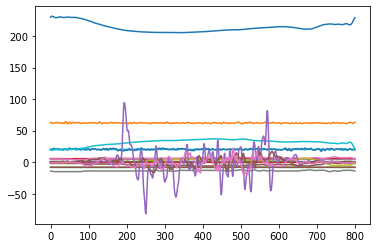

Open Bag


In [5]:
#print(test_label)
#print(train_features)
#all samples of first activity
n = 18
plt.plot(train_features[n])
plt.show()
print(labeldict[n])

#numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them
#done with one-hot-encoding
y_train_hot = np_utils.to_categorical(train_label, num_classes)
print('New y_train shape: ', y_train_hot.shape)

In [6]:

#number of hidden layer: around (number of inputs + 1)/2

#(input: ?-dimensional vectors) 
#       ↧

#.
#.
#.
#       ↧
#[Dense (1? units, softmax activation)]
#       ↧
#(output: integer for human activity (0-54))

#training data:
X_train = train_features
Y_train = train_label

print(X_train.shape)
X_test = test_features
Y_test = test_label

(2284, 800, 27)


In [45]:
verbose, epochs, batch_size = 2, 50, 32
n_timesteps, n_features, n_outputs = 800, 27, 55

visible = Input(shape=(n_timesteps,n_features))
conv1D = Conv1D(filters=64, kernel_size=7, activation='relu')(visible)
drop1 = Dropout(0.5)(conv1D)
pool1 = MaxPooling1D(pool_size=2)(drop1)
# model.add(Flatten())
drop2 = Dropout(0.5)(pool1)
gru1 = GRU(32, return_sequences=False, return_state=False)(drop2)
dens1 = Dense(32, activation='relu')(gru1)
flatten = Flatten()(dens1)
hidden = Dense(n_outputs, activation='softmax')(flatten)

model = Functional(inputs=visible, outputs=hidden)
print(model.summary())
"""    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle=True)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy"""

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 800, 27)]         0         
                                                                 
 conv1d_21 (Conv1D)          (None, 794, 64)           12160     
                                                                 
 dropout_24 (Dropout)        (None, 794, 64)           0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 397, 64)          0         
 g1D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 397, 64)           0         
                                                                 
 gru_12 (GRU)                (None, 32)                9408      
                                                           

"    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])\n    # fit network\n    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle=True)\n    # evaluate model\n    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)\n    return accuracy"

In [48]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [53]:
# run an experiment
def run_experiment(repeats=1):
    # load data
    trainX, trainy, testX, testy = train_features, Y_train, test_features, test_label
    # repeat experiment
    scores = list()
    for r in range(repeats):
        history = model.fit(trainX, trainy, batch_size=32, epochs=50, validation_split=0.2)
        score = model.evaluate(testX, testy, verbose=2)
        scores.append(score)
    # summarize results
    print("Test loss:", scores[0])
    print("Test accuracy:", scores[1])

In [54]:
run_experiment()

Epoch 1/50
58/58 [==============================] - 29s 492ms/step - loss: 4.0215 - accuracy: 0.0257 - val_loss: 4.0199 - val_accuracy: 0.0175
Epoch 2/50
58/58 [==============================] - 28s 488ms/step - loss: 4.0108 - accuracy: 0.0263 - val_loss: 4.0261 - val_accuracy: 0.0153
Epoch 3/50
58/58 [==============================] - 29s 495ms/step - loss: 4.0087 - accuracy: 0.0246 - val_loss: 4.0135 - val_accuracy: 0.0350
Epoch 4/50
58/58 [==============================] - 28s 487ms/step - loss: 3.9939 - accuracy: 0.0350 - val_loss: 4.0028 - val_accuracy: 0.0241
Epoch 5/50
58/58 [==============================] - 28s 487ms/step - loss: 3.9826 - accuracy: 0.0301 - val_loss: 4.0098 - val_accuracy: 0.0328
Epoch 6/50
58/58 [==============================] - 28s 489ms/step - loss: 3.9733 - accuracy: 0.0334 - val_loss: 3.9822 - val_accuracy: 0.0394
Epoch 7/50
58/58 [==============================] - 30s 523ms/step - loss: 3.9693 - accuracy: 0.0301 - val_loss: 3.9804 - val_accuracy: 0.0328

KeyboardInterrupt: 